In [44]:
from pyhdf.SD import SD, SDC
import h5py
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import icare
import sunrise
import nasa_plotting_scripts as nasa
import plotly.graph_objects as go

In [2]:
session = icare.ICARESession('/Users/jackpeele/Documents/Data Science/NASA/HDF')
# folder = session.listdir('CALIOP/SODA-333m.v2.00/2010/2010_03_02/')

ICARE Username: jpeele
ICARE Password: ···············


In [3]:
# root = 'CALIOP/SODA-333m.v2.00/2010/2010_03_02/'

def find_ACTIVATE(root):
    folder = session.listdir(root)
    PATH = []

    for data in folder:

        path = session.get_file(root + data)
        file = SD(path, SDC.READ)

        lat = file.select('Latitude').get()
        lon = file.select('Longitude').get()
        coords = pd.DataFrame({'lat': lat, 'lon': lon})

        if len(coords.query('lat > 32 & lat < 39 & lon > 70 & lon < 75')) > 0:
            print(path)
            PATH.append(path)
    
    return PATH

# find_ACTIVATE(root)

In [4]:
def find_ACTIVATE_in_range(root, rng):
    '''
    parse through folders, determine which days contain ACTIVATE region
    '''
    
    MATCH = []
    
    for i in range(rng):
        print(i)

        i += 4
        # root = 'CALIOP/SODA-333m.v2.00/2010/2010_03_'

        if i < 10:
            i = '0' + str(i) + '/'
        else:
            i = str(i) + '/'

        root = root + i

        MATCH.append(find_ACTIVATE(root))
    
    return MATCH
        

# a = find_ACTIVATE_in_range('CALIOP/SODA-333m.v2.00/2010/2010_03_', 1)

0
/Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_04/SODA-333m_2010-03-04T21-18-45ZN_V2-00.hdf


In [5]:
# Match

# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_04/SODA-333m_2010-03-04T21-18-45ZN_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_05/SODA-333m_2010-03-05T07-58-31ZD_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_06/SODA-333m_2010-03-06T21-06-36ZN_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_07/SODA-333m_2010-03-07T07-46-22ZD_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_08/SODA-333m_2010-03-08T20-54-27ZN_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_12/SODA-333m_2010-03-12T08-05-28ZD_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_13/SODA-333m_2010-03-13T21-13-33ZN_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_14/SODA-333m_2010-03-14T07-53-20ZD_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_15/SODA-333m_2010-03-15T21-01-25ZN_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_20/SODA-333m_2010-03-20T21-20-34ZN_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_21/SODA-333m_2010-03-21T08-00-20ZD_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_22/SODA-333m_2010-03-22T21-08-25ZN_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_23/SODA-333m_2010-03-23T07-48-11ZD_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_24/SODA-333m_2010-03-24T20-56-16ZN_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_28/SODA-333m_2010-03-28T08-07-18ZD_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_29/SODA-333m_2010-03-29T21-15-22ZN_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_31/SODA-333m_2010-03-31T21-03-14ZN_V2-00.hdf

In [6]:
path = session.get_file('CALIOP/SODA-333m.v2.00/2010/2010_03_05/SODA-333m_2010-03-05T07-58-31ZD_V2-00.hdf')
file = SD(path, SDC.READ)

In [7]:
datasets_dic = file.datasets()

for idx,sds in enumerate(datasets_dic.keys()):
    print(idx,sds)

0 Latitude
1 Longitude
2 TAI_Time
3 GMAO_Altitudes
4 VFM_Altitudes
5 Total_Attenuated_Surface_Cross_Section_532
6 Total_Attenuated_Surface_Cross_Section_1064
7 Perpendicular_Attenuated_Surface_Cross_Section_532
8 CPR_Attenuated_Cross_Section
9 Depolarization_Aerosol_Upper_Layer
10 AMSR_E_Surface_Wind_Speed
11 AMSR_E_Atmospheric_Water_Vapor
12 AMSR_E_cloud_liquid_water_path
13 AMSR_E_Sea_Surface_Temperature
14 GMAO_Ozone
15 GMAO_Pressure
16 GMAO_Temperature
17 GMAO_relative_humidity
18 Optical_Depth_CPR_CAL532
19 Optical_Depth_CPR_CAL1064
20 Optical_Depth_AMSR_CAL532
21 Optical_Depth_AMSR_CAL1064
22 Optical_Depth_MODIS_550
23 Optical_Depth_MODIS_1064
24 Optical_Depth_532_Over_Liquid_Water_Cloud
25 Optical_Depth_1064_Over_Liquid_Water_Cloud
26 Angstrom_Exponent
27 Lidar_Ratio_532
28 Lidar_Ratio_1064
29 Particle_Depolarization
30 Particle_Total_Integrated_Backscatter_532
31 Total_Perpendicular_Integrated_Backscatter_532
32 Total_Integrated_Backscatter_1064
33 Angstrom_Exponent_Over_Liquid

In [8]:
lat = file.select('Latitude').get()
lon = file.select('Longitude').get()
temp = pd.DataFrame({'lat': lat, 'long': lon})

In [9]:
index = np.array(temp.query('lat > 32 & lat < 39 & long > 70 & long < 75').index)

In [10]:
time = file.select('TAI_Time').get()
temp['tai_time'] = time

In [11]:
ACTIVATE = temp.loc[index]

In [12]:
def ACTIVATE_time_to_utc(time):
    
    # https://hpiers.obspm.fr/eop-pc/index.php?index=TAI-UTC_tab&lang=en
    # leap seconds for a given date
    
    UTC = []
    
    for t in time:
        utc = datetime(1993, 1, 1) + timedelta(seconds = t - (34 - 27))
        UTC.append(utc)
    
    return UTC

In [13]:
ACTIVATE['utc'] = ACTIVATE_time_to_utc(ACTIVATE['tai_time'])

In [14]:
def find_sunrise(ACTIVATE):
    
    # do I need to adjust time zones?
    
    SRISE = []
    
    for i in range(len(ACTIVATE)):
        s = sunrise.sun(lat = list(ACTIVATE['lat'])[i], long = list(ACTIVATE['long'])[i])
        srise = s.sunrise(when = list(ACTIVATE['utc'])[i])
        SRISE.append(srise)
    
    return SRISE        

In [15]:
ACTIVATE['sunrise'] = find_sunrise(ACTIVATE)

In [16]:
def find_sunset(ACTIVATE):
    
    # do I need to adjust time zones?
    
    SSET = []
    
    for i in range(len(ACTIVATE)):
        s = sunrise.sun(lat = list(ACTIVATE['lat'])[i], long = list(ACTIVATE['long'])[i])
        sset = s.sunset(when = list(ACTIVATE['utc'])[i])
        SSET.append(sset)
    
    return SSET    

In [17]:
ACTIVATE['sunset'] = find_sunset(ACTIVATE)

In [18]:
ACTIVATE['month'] = [x.month for x in ACTIVATE.utc]
ACTIVATE['day'] = [x.day for x in ACTIVATE.utc]
ACTIVATE['year'] = [x.year for x in ACTIVATE.utc]
ACTIVATE['hour'] = [x.hour for x in ACTIVATE.sunrise]
ACTIVATE['minute'] = [x.minute for x in ACTIVATE.sunrise]
ACTIVATE['second'] = [x.second for x in ACTIVATE.sunrise]

ACTIVATE['sunrise'] = pd.to_datetime(ACTIVATE[['year', 'month', 'day', 'hour', 'minute', 'second']]) 

In [19]:
ACTIVATE['hour'] = [x.hour for x in ACTIVATE.sunset]
ACTIVATE['minute'] = [x.minute for x in ACTIVATE.sunset]
ACTIVATE['second'] = [x.second for x in ACTIVATE.sunset]

ACTIVATE['sunset'] = pd.to_datetime(ACTIVATE[['year', 'month', 'day', 'hour', 'minute', 'second']]) 

In [20]:
ACTIVATE.drop(['month', 'day', 'year', 'hour', 'minute', 'second'], axis = 1, inplace = True)

In [21]:
ACTIVATE

,lat,long,tai_time,utc,sunrise,sunset
43451,32.002369,72.922577,5.419317e+08,2010-03-05 08:34:21.198600,2010-03-05 01:32:15,2010-03-05 13:07:53
43452,32.005344,72.921768,5.419317e+08,2010-03-05 08:34:21.248200,2010-03-05 01:32:15,2010-03-05 13:07:53
43453,32.008320,72.920952,5.419317e+08,2010-03-05 08:34:21.297800,2010-03-05 01:32:15,2010-03-05 13:07:53
43454,32.011295,72.920135,5.419317e+08,2010-03-05 08:34:21.347400,2010-03-05 01:32:16,2010-03-05 13:07:53
43455,32.014271,72.919319,5.419317e+08,2010-03-05 08:34:21.397000,2010-03-05 01:32:16,2010-03-05 13:07:53
...,...,...,...,...,...,...
45800,38.987087,70.912476,5.419318e+08,2010-03-05 08:36:17.704000,2010-03-05 01:44:42,2010-03-05 13:11:31
45801,38.990047,70.911568,5.419318e+08,2010-03-05 08:36:17.753600,2010-03-05 01:44:42,2010-03-05 13:11:31
45802,38.993004,70.910667,5.419318e+08,2010-03-05 08:36:17.803200,2010-03-05 01:44:42,2010-03-05 13:11:31
45803,38.995956,70.909767,5.419318e+08,2010-03-05 08:36:17.852800,2010-03-05 01:44:43,2010-03-05 13:11:31


In [22]:
DN = []

for i in range(len(ACTIVATE)):
    if list(ACTIVATE.utc)[i] > list(ACTIVATE.sunrise)[i] and list(ACTIVATE.utc)[i] < list(ACTIVATE.sunset)[i]:
        dn = 'day'
        DN.append(dn)
    else:
        dn = 'night'
        DN.append(dn)

In [23]:
ACTIVATE['day_or_night'] = DN

In [24]:
# are time zones the same?

ACTIVATE

,lat,long,tai_time,utc,sunrise,sunset,day_or_night
43451,32.002369,72.922577,5.419317e+08,2010-03-05 08:34:21.198600,2010-03-05 01:32:15,2010-03-05 13:07:53,day
43452,32.005344,72.921768,5.419317e+08,2010-03-05 08:34:21.248200,2010-03-05 01:32:15,2010-03-05 13:07:53,day
43453,32.008320,72.920952,5.419317e+08,2010-03-05 08:34:21.297800,2010-03-05 01:32:15,2010-03-05 13:07:53,day
43454,32.011295,72.920135,5.419317e+08,2010-03-05 08:34:21.347400,2010-03-05 01:32:16,2010-03-05 13:07:53,day
43455,32.014271,72.919319,5.419317e+08,2010-03-05 08:34:21.397000,2010-03-05 01:32:16,2010-03-05 13:07:53,day
...,...,...,...,...,...,...,...
45800,38.987087,70.912476,5.419318e+08,2010-03-05 08:36:17.704000,2010-03-05 01:44:42,2010-03-05 13:11:31,day
45801,38.990047,70.911568,5.419318e+08,2010-03-05 08:36:17.753600,2010-03-05 01:44:42,2010-03-05 13:11:31,day
45802,38.993004,70.910667,5.419318e+08,2010-03-05 08:36:17.803200,2010-03-05 01:44:42,2010-03-05 13:11:31,day
45803,38.995956,70.909767,5.419318e+08,2010-03-05 08:36:17.852800,2010-03-05 01:44:43,2010-03-05 13:11:31,day


In [50]:
# temp['Optical_Depth_CPR_CAL532'] = file.select('Optical_Depth_CPR_CAL532').get()

In [51]:
# ACTIVATE['Optical_Depth_CPR_CAL532'] = temp.Optical_Depth_CPR_CAL532.loc[index]

In [52]:
# ACTIVATE.Optical_Depth_CPR_CAL532[ACTIVATE.Optical_Depth_CPR_CAL532 != -32768]

Series([], Name: Optical_Depth_CPR_CAL532, dtype: int16)

In [25]:
datasets_dic = file.datasets()

OD = []

for idx,sds in enumerate(datasets_dic.keys()):
    if "Optical_Depth" in sds and "Error" not in sds:
        OD.append(sds)

In [31]:
has_data = []

for i in OD:
    temp[i] = file.select(i).get()
    ACTIVATE[i] = temp[i].loc[index]
    if len(ACTIVATE[i][ACTIVATE[i] != -32768]) > 1:
        has_data.append(i)

In [49]:
has_data

['Optical_Depth_MODIS_550']

In [35]:
ACTIVATE

,lat,long,tai_time,utc,sunrise,sunset,day_or_night,Optical_Depth_CPR_CAL532,Optical_Depth_CPR_CAL1064,Optical_Depth_AMSR_CAL532,Optical_Depth_AMSR_CAL1064,Optical_Depth_MODIS_550,Optical_Depth_MODIS_1064,Optical_Depth_532_Over_Liquid_Water_Cloud,Optical_Depth_1064_Over_Liquid_Water_Cloud
43451,32.002369,72.922577,5.419317e+08,2010-03-05 08:34:21.198600,2010-03-05 01:32:15,2010-03-05 13:07:53,day,-32768,-32768,-32768,-32768,279,-32768,-32768,-32768
43452,32.005344,72.921768,5.419317e+08,2010-03-05 08:34:21.248200,2010-03-05 01:32:15,2010-03-05 13:07:53,day,-32768,-32768,-32768,-32768,279,-32768,-32768,-32768
43453,32.008320,72.920952,5.419317e+08,2010-03-05 08:34:21.297800,2010-03-05 01:32:15,2010-03-05 13:07:53,day,-32768,-32768,-32768,-32768,279,-32768,-32768,-32768
43454,32.011295,72.920135,5.419317e+08,2010-03-05 08:34:21.347400,2010-03-05 01:32:16,2010-03-05 13:07:53,day,-32768,-32768,-32768,-32768,279,-32768,-32768,-32768
43455,32.014271,72.919319,5.419317e+08,2010-03-05 08:34:21.397000,2010-03-05 01:32:16,2010-03-05 13:07:53,day,-32768,-32768,-32768,-32768,220,-32768,-32768,-32768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45800,38.987087,70.912476,5.419318e+08,2010-03-05 08:36:17.704000,2010-03-05 01:44:42,2010-03-05 13:11:31,day,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768
45801,38.990047,70.911568,5.419318e+08,2010-03-05 08:36:17.753600,2010-03-05 01:44:42,2010-03-05 13:11:31,day,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768
45802,38.993004,70.910667,5.419318e+08,2010-03-05 08:36:17.803200,2010-03-05 01:44:42,2010-03-05 13:11:31,day,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768
45803,38.995956,70.909767,5.419318e+08,2010-03-05 08:36:17.852800,2010-03-05 01:44:43,2010-03-05 13:11:31,day,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768


In [29]:
has_data

['Optical_Depth_MODIS_550']

In [36]:
ACTIVATE[ACTIVATE.Optical_Depth_MODIS_550 != -32768]

,lat,long,tai_time,utc,sunrise,sunset,day_or_night,Optical_Depth_CPR_CAL532,Optical_Depth_CPR_CAL1064,Optical_Depth_AMSR_CAL532,Optical_Depth_AMSR_CAL1064,Optical_Depth_MODIS_550,Optical_Depth_MODIS_1064,Optical_Depth_532_Over_Liquid_Water_Cloud,Optical_Depth_1064_Over_Liquid_Water_Cloud
43451,32.002369,72.922577,5.419317e+08,2010-03-05 08:34:21.198600,2010-03-05 01:32:15,2010-03-05 13:07:53,day,-32768,-32768,-32768,-32768,279,-32768,-32768,-32768
43452,32.005344,72.921768,5.419317e+08,2010-03-05 08:34:21.248200,2010-03-05 01:32:15,2010-03-05 13:07:53,day,-32768,-32768,-32768,-32768,279,-32768,-32768,-32768
43453,32.008320,72.920952,5.419317e+08,2010-03-05 08:34:21.297800,2010-03-05 01:32:15,2010-03-05 13:07:53,day,-32768,-32768,-32768,-32768,279,-32768,-32768,-32768
43454,32.011295,72.920135,5.419317e+08,2010-03-05 08:34:21.347400,2010-03-05 01:32:16,2010-03-05 13:07:53,day,-32768,-32768,-32768,-32768,279,-32768,-32768,-32768
43455,32.014271,72.919319,5.419317e+08,2010-03-05 08:34:21.397000,2010-03-05 01:32:16,2010-03-05 13:07:53,day,-32768,-32768,-32768,-32768,220,-32768,-32768,-32768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44455,34.991753,72.095276,5.419317e+08,2010-03-05 08:35:10.995000,2010-03-05 01:37:21,2010-03-05 13:09:24,day,-32768,-32768,-32768,-32768,273,-32768,-32768,-32768
44456,34.994720,72.094437,5.419317e+08,2010-03-05 08:35:11.044600,2010-03-05 01:37:22,2010-03-05 13:09:24,day,-32768,-32768,-32768,-32768,273,-32768,-32768,-32768
44457,34.997684,72.093605,5.419317e+08,2010-03-05 08:35:11.094200,2010-03-05 01:37:22,2010-03-05 13:09:24,day,-32768,-32768,-32768,-32768,273,-32768,-32768,-32768
44458,35.000652,72.092766,5.419317e+08,2010-03-05 08:35:11.143800,2010-03-05 01:37:22,2010-03-05 13:09:24,day,-32768,-32768,-32768,-32768,273,-32768,-32768,-32768


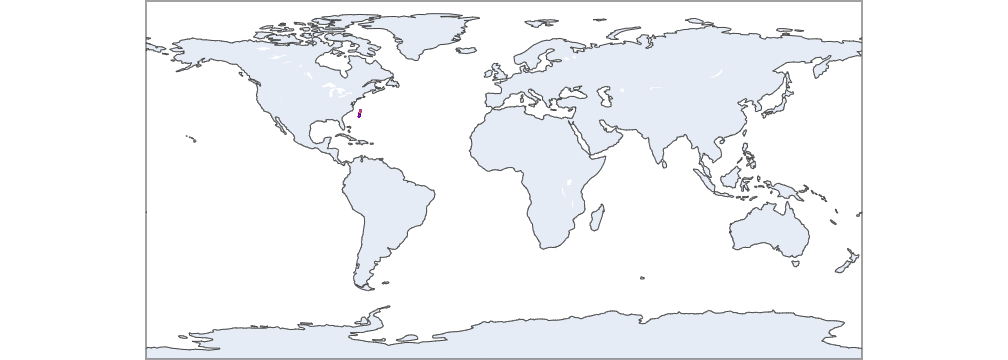

In [52]:
activate = ACTIVATE[["lat", "long", "Optical_Depth_MODIS_550"]].query(
    f"Optical_Depth_MODIS_550 != -32768"
)
fig = go.Figure()

fig.add_trace(
    go.Scattergeo(
        lon=(-1 *activate["long"]),
        lat=(activate["lat"]),
        hoverinfo="text",
        # multiply by scale factor
        text="Optical_Depth_MODIS_550: " + (activate["Optical_Depth_MODIS_550"] * 0.001).astype(str),
        mode="markers",
        marker=dict(size=2, color=activate["Optical_Depth_MODIS_550"]),
    )
)

fig.update_layout(margin=dict(l=1, r=1, t=1, b=1))
fig.show()